# <center>From Variables to Predictions: A comprehensive analysis of BRFSS Data</center>

**This project delves into analyzing stroke risk factors with BRFSS (Behavioral Risk Factors and
Surveillance System) EDA, Hypothesis Testing, and Logistic Regression.**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Data Pre-Processing and Cleaning

In [2]:
df = pd.read_csv('brfss2020.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Columns: 279 entries, _STATE to _AIDTST4
dtypes: float64(274), int64(5)
memory usage: 855.6 MB


In [4]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,1042020,1,4,2020,1100.0,2020000001,2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,69.640207,1.0,69.640207,1.0,NaN,NaN,NaN,NaN,1.0,0.465411,460.002849,284.335672,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,1.0,9.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,2072020,2,7,2020,1200.0,2020000002,2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA',
       '_VIRCOLN', '_SBONTIM', '_CRCREC1', '_AIDTST4'],
      dtype='object', length=279)

# Stroke Risk Factors:

#### Non-modifiable Risk Factors:

**Age:** The risk of stroke increases with age, and the risk doubles for each decade after the age of 55.

**Gender:** Historically, men were at a higher risk of stroke than women. However, the gap has been narrowing, and stroke can affect both sexes. Women, particularly those who are pregnant, taking birth control pills, or using hormone replacement therapy, may have specific stroke risk factors related to these conditions.

**Race and Ethnicity:** Some racial and ethnic groups, including African Americans, Hispanics, and Native Americans, have a higher risk of stroke than others.

#### Modifiable Risk Factors:

**High Blood Pressure (Hypertension):** Uncontrolled high blood pressure is the most significant risk factor for stroke. Managing blood pressure through medication, lifestyle changes, and regular check-ups is essential.

**Smoking:** Smoking increases the risk of stroke by damaging blood vessels and promoting the formation of blood clots. Quitting smoking can significantly reduce this risk.

**High Cholesterol:** Elevated levels of LDL (low-density lipoprotein) cholesterol, often referred to as "bad" cholesterol, can lead to the buildup of plaque in the arteries (atherosclerosis), increasing the risk of stroke. Lifestyle changes and medications can help manage cholesterol levels.

**Diabetes:** Individuals with diabetes have an increased risk of stroke due to the potential damage to blood vessels caused by high blood sugar levels. Proper diabetes management is crucial in reducing stroke risk.

**Obesity:** Being overweight or obese can contribute to other risk factors for stroke, such as high blood pressure and diabetes. Maintaining a healthy weight through diet and exercise can help lower the risk.

**Physical Inactivity:** A sedentary lifestyle is associated with a higher risk of stroke. Regular physical activity can help maintain a healthy weight, reduce blood pressure, and improve overall cardiovascular health.

**Excessive Alcohol Consumption:** Heavy alcohol consumption can lead to high blood pressure and increase the risk of stroke. Moderation in alcohol consumption is advised.

**Heart disease:** Heart disease is the second most important risk factor for stroke, and the major cause of death among survivors of stroke.


## Risk factor columns available:

**Non-modifiable Factors**
- 1) _AGE80 (ages in numbers)
- 2) _AGEG5YR (age groups)
- 3) _SEX (gender)
- 4) _IMPRACE (race)

**Modifiable Factors**
- 1) _SMOKER3 (smoking)
- 2) DIABETE4 (diabetes)
- 3) _RFBMI5 (obesity)
- 4) _TOTINDA (physical activity)
- 5) _RFDRHV7 (heavy drinker)
- 7) CVDINFR4 (heart attack)
- 8) CVDCRHD4 (angina or other CHD)


In [6]:
# Getting the location of desired columns:

desired_columns = ['_AGE80','_AGEG5YR','_SEX','_IMPRACE','CVDSTRK3','_SMOKER3','DIABETE4','_RFBMI5','_TOTINDA','_RFDRHV7',
                    'CVDINFR4','CVDCRHD4']
selected_columns = []
for i in desired_columns:
    columns_index = df.columns.get_loc(i)
    selected_columns.append(columns_index)
selected_columns

[243, 241, 240, 211, 44, 254, 53, 250, 224, 260, 42, 43]

In [7]:
# Getting the selected columns
stroke_rf =df.iloc[:, selected_columns] # here, stroke_rf = stroke risk factors
stroke_rf

,_AGE80,_AGEG5YR,_SEX,_IMPRACE,CVDSTRK3,_SMOKER3,DIABETE4,_RFBMI5,_TOTINDA,_RFDRHV7,CVDINFR4,CVDCRHD4
0,56.0,8.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
1,65.0,10.0,2.0,2.0,2.0,9.0,3.0,2.0,1.0,9.0,2.0,2.0
2,65.0,10.0,2.0,2.0,2.0,4.0,3.0,9.0,1.0,1.0,2.0,2.0
3,80.0,13.0,2.0,1.0,2.0,4.0,3.0,9.0,2.0,1.0,2.0,2.0
4,80.0,13.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
401953,45.0,6.0,2.0,5.0,2.0,4.0,3.0,1.0,1.0,1.0,2.0,2.0
401954,29.0,2.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,1.0,2.0,2.0
401955,80.0,13.0,2.0,5.0,2.0,4.0,3.0,2.0,1.0,1.0,2.0,2.0
401956,58.0,8.0,1.0,5.0,2.0,9.0,3.0,2.0,1.0,1.0,2.0,2.0


In [8]:
# getting the columns in stroke_rf variable

stroke_rf.columns

Index(['_AGE80', '_AGEG5YR', '_SEX', '_IMPRACE', 'CVDSTRK3', '_SMOKER3',
       'DIABETE4', '_RFBMI5', '_TOTINDA', '_RFDRHV7', 'CVDINFR4', 'CVDCRHD4'],
      dtype='object')

In [9]:
# renaming the stroke_rf columns

stroke_rf.columns = ['ages','age_groups', 'gender', 'race', 'stroke_status', 'smoking_status','diabetes_status', 'bmi_groups',
                    'physical_activity', 'heavy_drinker', 'heart_attack', 'angina_chd']
stroke_rf.columns

Index(['ages', 'age_groups', 'gender', 'race', 'stroke_status',
       'smoking_status', 'diabetes_status', 'bmi_groups', 'physical_activity',
       'heavy_drinker', 'heart_attack', 'angina_chd'],
      dtype='object')

In [10]:
missing_values = stroke_rf[['ages','age_groups', 'gender', 'race', 'stroke_status', 'smoking_status','diabetes_status', 'bmi_groups',
                    'physical_activity', 'heavy_drinker', 'heart_attack', 'angina_chd']].isnull().sum()
print('Missing Values:')
missing_values

Missing Values:


ages                 0
age_groups           0
gender               0
race                 0
stroke_status        3
smoking_status       0
diabetes_status      6
bmi_groups           0
physical_activity    0
heavy_drinker        0
heart_attack         6
angina_chd           3
dtype: int64

# Examining the Distribution and Visualizing The Selected Variables

In [12]:
stroke_rf.columns

Index(['ages', 'age_groups', 'gender', 'race', 'stroke_status',
       'smoking_status', 'diabetes_status', 'bmi_groups', 'physical_activity',
       'heavy_drinker', 'heart_attack', 'angina_chd'],
      dtype='object')

# Distribution of Ages

Null Values: [0]
Number of Values:
[80.0    31459
65.0     9457
60.0     8925
70.0     8773
62.0     8684
        ...  
23.0     3817
22.0     3793
20.0     3479
18.0     3406
19.0     3395
Name: ages, Length: 63, dtype: int64]


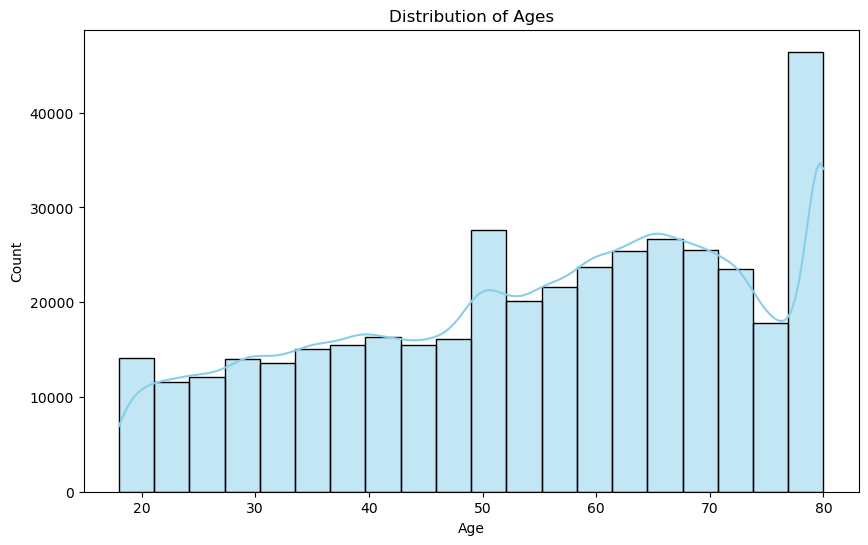

In [13]:
print('Null Values:', [stroke_rf['ages'].isnull().sum()])
print('Number of Values:')
print([stroke_rf['ages'].value_counts()])
plt.figure(figsize=(10, 6))
sns.histplot(data=stroke_rf, x='ages', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Age Groups

Null Values: [0]
Number of Values:
[10.0    41570
9.0     41151
11.0    37972
8.0     36219
13.0    31456
7.0     31110
12.0    26607
6.0     26428
5.0     25729
1.0     25648
4.0     25492
3.0     23408
2.0     20911
14.0     8257
Name: age_groups, dtype: int64]


Text(0.5, 1.0, 'Distribution of Age Groups')

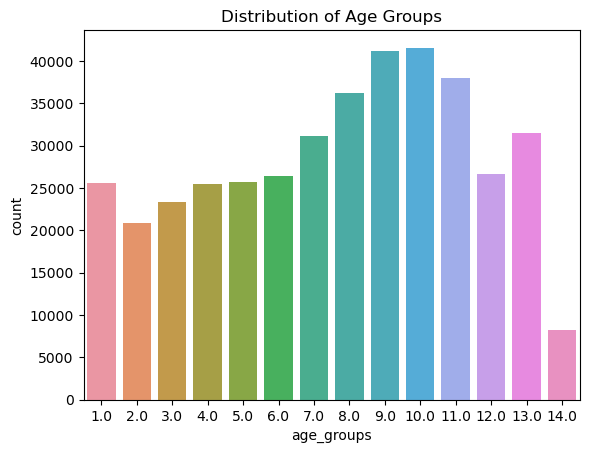

In [14]:
print('Null Values:', [stroke_rf['age_groups'].isnull().sum()])
print('Number of Values:')
print([stroke_rf['age_groups'].value_counts()])
sns.countplot(x='age_groups', data=stroke_rf)
plt.title('Distribution of Age Groups')

# Distribution of Gender

Null Values: [0]
Number of Values:
Female    218027
Male      183931
Name: gender, dtype: int64


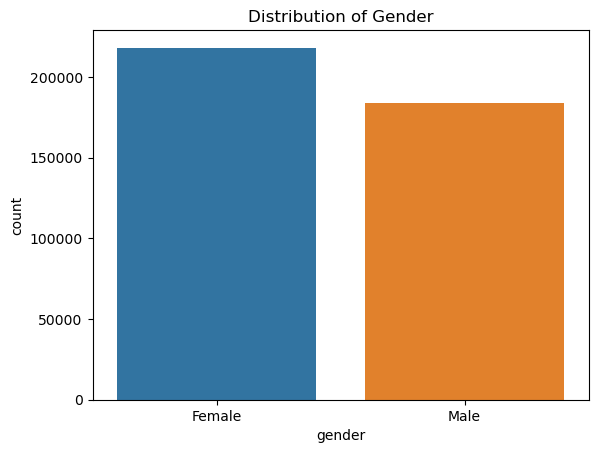

In [18]:
print('Null Values:', [stroke_rf['gender'].isnull().sum()])
print('Number of Values:')
print(stroke_rf['gender'].value_counts())
sns.countplot(x='gender', data=stroke_rf)
chg_gender = {1.0: 'Male', 2.0: 'Female'}
stroke_rf['gender'] = stroke_rf['gender'].replace(to_replace=chg_gender)
plt.title('Distribution of Gender')
plt.show()

In [19]:
stroke_rf['gender'].unique()

array(['Female', 'Male'], dtype=object)

# Distribution of Race

Null Values: [0]
Number of Values:
White       303886
Hispanic     36408
Black        30390
Other        14077
Asian        10243
Alaskan       6954
Name: race, dtype: int64


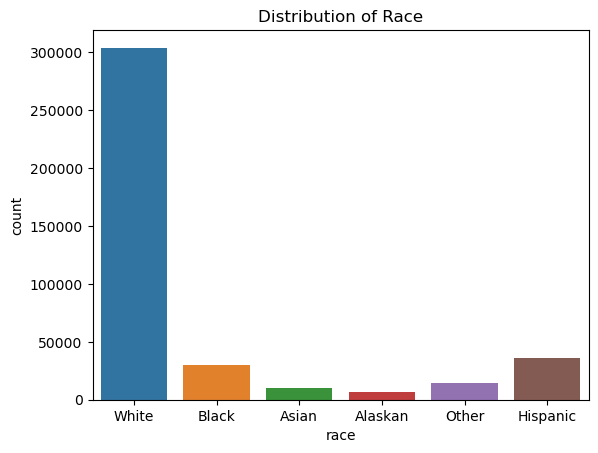

In [21]:
print('Null Values:', [stroke_rf['race'].isnull().sum()])
print('Number of Values:')
print(stroke_rf['race'].value_counts())
sns.countplot(x='race', data=stroke_rf)
chg_race = {1.0: 'White', 2.0: 'Black', 3.0: 'Asian', 4.0: 'Alaskan', 5.0: 'Hispanic', 6.0: 'Other'}
stroke_rf['race'] = stroke_rf['race'].replace(to_replace=chg_race)
plt.title('Distribution of Race')
plt.show()

# Distribution of Stroke Status

Null Values: [3]
Number of Values:
No     385095
Yes     15677
7.0       891
9.0       292
Name: stroke_status, dtype: int64


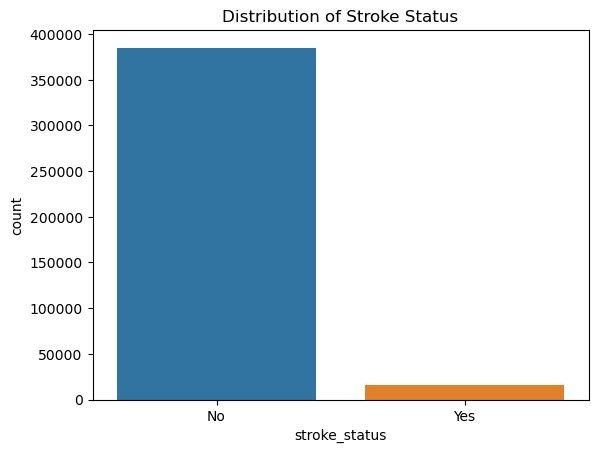

In [94]:
print('Null Values:', [stroke_rf['stroke_status'].isnull().sum()])
print('Number of Values:')
print(stroke_rf['stroke_status'].value_counts())
sns.countplot(x='stroke_status', data=stroke_rf[~stroke_rf['stroke_status'].isin([7, 9])])
chg_stroke = {1.0: 'Yes', 2.0: 'No'}
stroke_rf['stroke_status'] = stroke_rf['stroke_status'].replace(to_replace=chg_stroke)
plt.title('Distribution of Stroke Status')
plt.show()

# Distribution of Smoking Status

Null Values: [0]
Number of Values:
[NonSmoker    224535
Former       103835
EveryDay      38152
9.0           21100
SomeDay       14336
Name: smoking_status, dtype: int64]


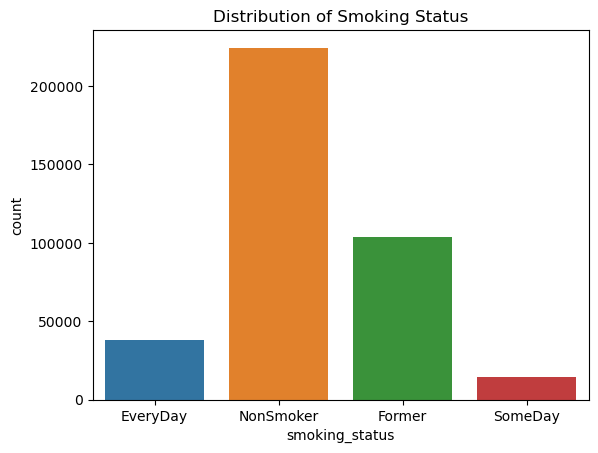

In [26]:
print('Null Values:', [stroke_rf['smoking_status'].isnull().sum()])
print('Number of Values:')
print([stroke_rf['smoking_status'].value_counts()])
sns.countplot(x='smoking_status', data=stroke_rf[~stroke_rf['smoking_status'].isin([9])])
chg_smoking = {1.0: 'EveryDay', 2.0: 'SomeDay', 3.0: 'Former', 4.0: 'NonSmoker'}
stroke_rf['smoking_status'] = stroke_rf['smoking_status'].replace(to_replace=chg_smoking)
plt.title('Distribution of Smoking Status')
plt.show()

# Distribution of Diabetes Status

Null Values: [6]
Number of Values:
[NonDiabetic    345676
Diabetic        52094
PrgDiabetic      3374
7.0               488
9.0               320
Name: diabetes_status, dtype: int64]


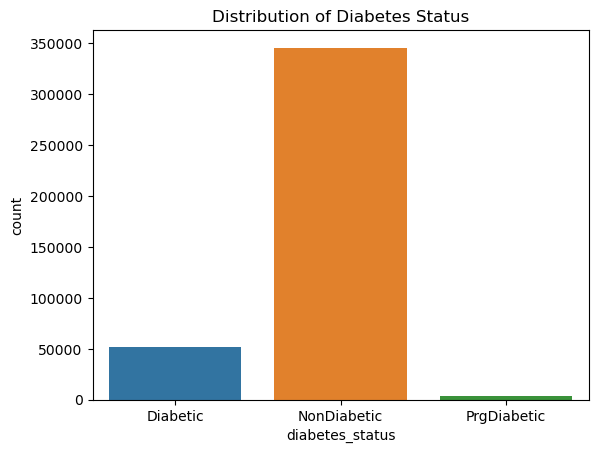

In [28]:
print('Null Values:', [stroke_rf['diabetes_status'].isnull().sum()])
print('Number of Values:')
print([stroke_rf['diabetes_status'].value_counts()])
sns.countplot(x='diabetes_status', data=stroke_rf[~stroke_rf['diabetes_status'].isin([7,9])])
chg_diabetes = {1.0: 'Diabetic', 2.0: 'PrgDiabetic', 3.0: 'NonDiabetic', 4.0: 'NonDiabetic'}
stroke_rf['diabetes_status'] = stroke_rf['diabetes_status'].replace(to_replace=chg_diabetes)
plt.title('Distribution of Diabetes Status')
plt.show()

# Distribution of BMI Groups

Null Values: [0]
Number of Values:
[OverWeight    244487
Normal        116114
9.0            41357
Name: bmi_groups, dtype: int64]


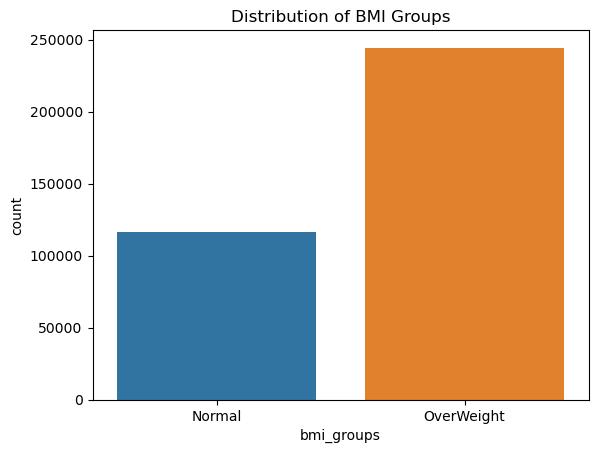

In [31]:
print('Null Values:', [stroke_rf['bmi_groups'].isnull().sum()])
print('Number of Values:')
print([stroke_rf['bmi_groups'].value_counts()])
sns.countplot(x='bmi_groups', data=stroke_rf[~stroke_rf['bmi_groups'].isin([9])])
chg_bmi = {1.0: 'Normal', 2.0: 'OverWeight'}
stroke_rf['bmi_groups'] = stroke_rf['bmi_groups'].replace(to_replace=chg_bmi)
plt.title('Distribution of BMI Groups')
plt.show()

# Distribution of Physical Activity

Null Values: [0]
Number of Values:
PhysicallyActive      305883
PhysicallyInactive     95393
9.0                      682
Name: physical_activity, dtype: int64


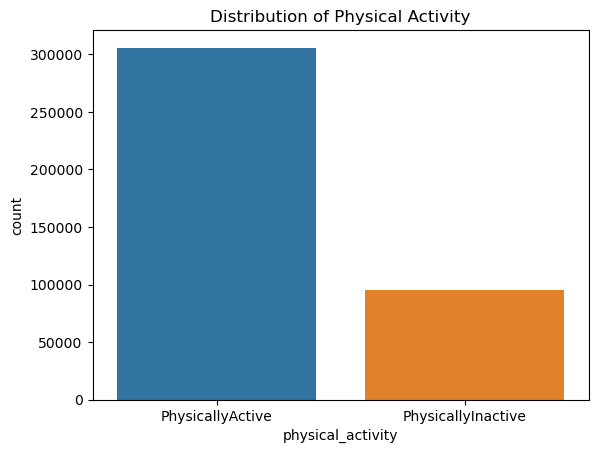

In [34]:
print('Null Values:', [stroke_rf['physical_activity'].isnull().sum()])
print('Number of Values:')
print(stroke_rf['physical_activity'].value_counts())
sns.countplot(x='physical_activity', data=stroke_rf[~stroke_rf['physical_activity'].isin([9])])
chg_phy = {1.0: 'PhysicallyActive', 2.0: 'PhysicallyInactive'}
stroke_rf['physical_activity'] = stroke_rf['physical_activity'].replace(to_replace=chg_phy)
plt.title('Distribution of Physical Activity')
plt.show()

# Distribution of Heavy Drinker 

Null Values: [0]
Number of Values:
[No     347309
9.0     30691
Yes     23958
Name: heavy_drinker, dtype: int64]


<AxesSubplot:title={'center':'Distribution of Heavy Drinker'}, xlabel='heavy_drinker', ylabel='count'>

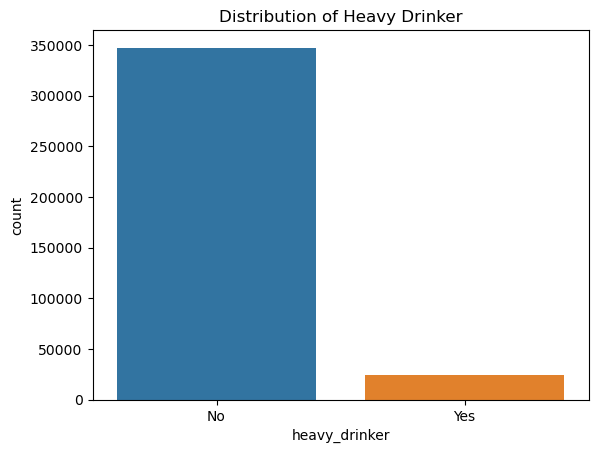

In [37]:
print('Null Values:', [stroke_rf['heavy_drinker'].isnull().sum()])
print('Number of Values:')
print([stroke_rf['heavy_drinker'].value_counts()])
chg_drnk = {1.0: 'No', 2.0: 'Yes'}
stroke_rf['heavy_drinker'] = stroke_rf['heavy_drinker'].replace(to_replace=chg_drnk)
plt.title('Distribution of Heavy Drinker')
sns.countplot(x='heavy_drinker', data=stroke_rf[~stroke_rf['heavy_drinker'].isin([9])])

# Distribution of Heart Attack

Null Values: [6]
Number of Values:
No     377918
Yes     21957
7.0      1761
9.0       316
Name: heart_attack, dtype: int64


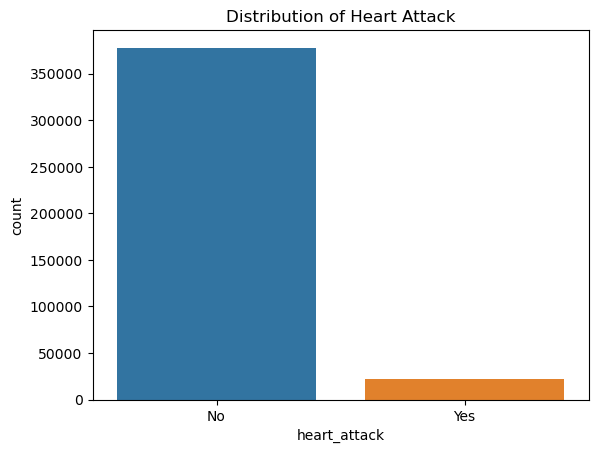

In [39]:
print('Null Values:', [stroke_rf['heart_attack'].isnull().sum()])
print('Number of Values:')
print(stroke_rf['heart_attack'].value_counts())
sns.countplot(x='heart_attack', data=stroke_rf[~stroke_rf['heart_attack'].isin([7,9])])
chg_hrtattack = {1.0: 'Yes', 2.0: 'No'}
stroke_rf['heart_attack'] = stroke_rf['heart_attack'].replace(to_replace=chg_hrtattack)
plt.title('Distribution of Heart Attack')
plt.show()

# Distribution of Angina / CHD

Null Values: [3]
Number of Values:
[No     376058
Yes     22598
7.0      2962
9.0       337
Name: angina_chd, dtype: int64]


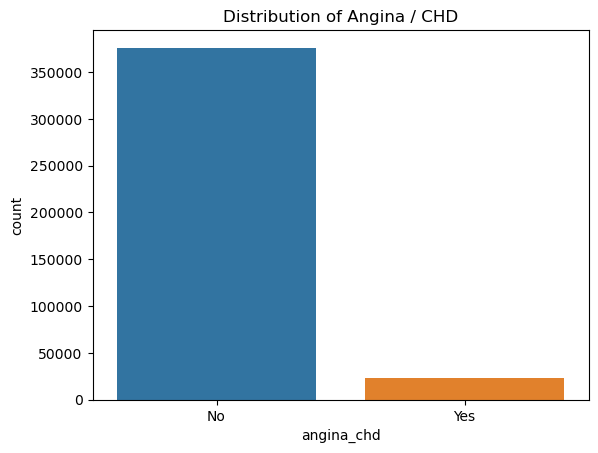

In [41]:
print('Null Values:', [stroke_rf['angina_chd'].isnull().sum()])
print('Number of Values:')
print([stroke_rf['angina_chd'].value_counts()])
sns.countplot(x='angina_chd', data=stroke_rf[~stroke_rf['angina_chd'].isin([7,9])])
chg_angina = {1.0: 'Yes', 2.0: 'No'}
stroke_rf['angina_chd'] = stroke_rf['angina_chd'].replace(to_replace=chg_angina)
plt.title('Distribution of Angina / CHD')
plt.show()

# Effect of Risk factors on stroke (Visualizations, Precentages & Counts): 

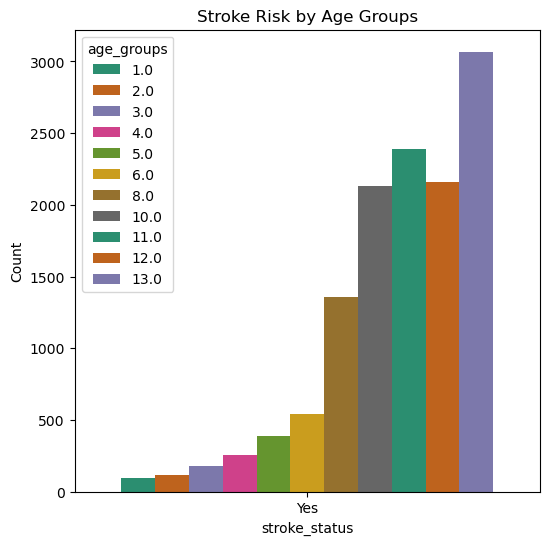

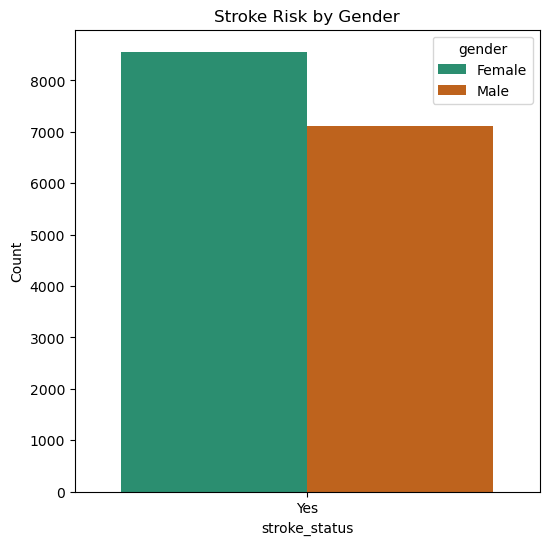

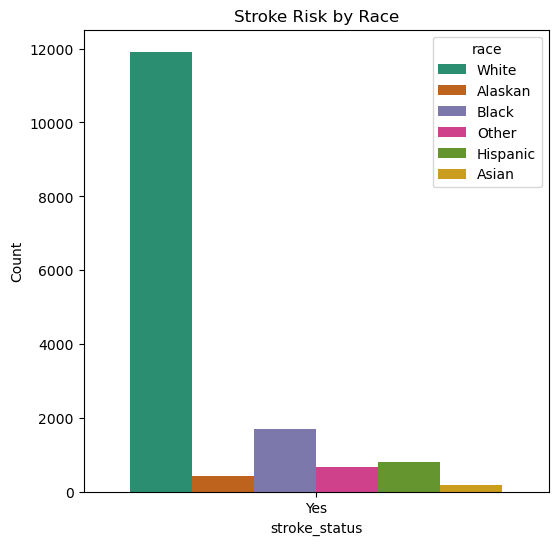

In [57]:
# Function to create bar plots for categorical variables
def plot_categorical_relationships(column, title, palette='Dark2'):
    plt.figure(figsize=(6, 6))
    sns.countplot(x="stroke_status", hue= column, data=stroke_rf[(stroke_rf['stroke_status']== 'Yes') 
                                                                 & ~((stroke_rf[column].isin([7,9,14])))], palette = palette)
    plt.title(title)
    plt.ylabel("Count")
    plt.show()

# Plotting for each categorical variable
plot_categorical_relationships("age_groups", "Stroke Risk by Age Groups")
plot_categorical_relationships("gender", "Stroke Risk by Gender")
plot_categorical_relationships("race", "Stroke Risk by Race")


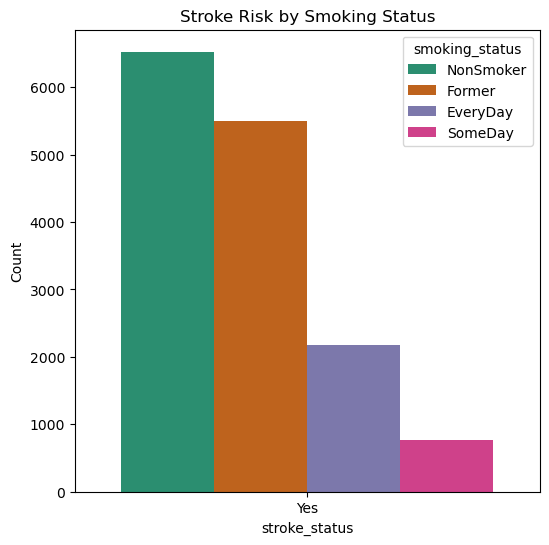

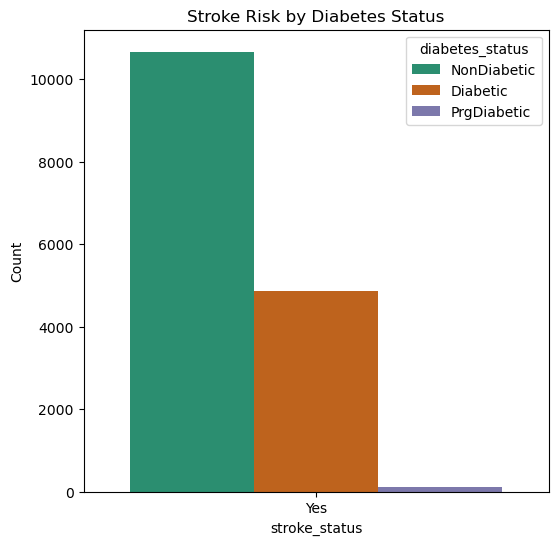

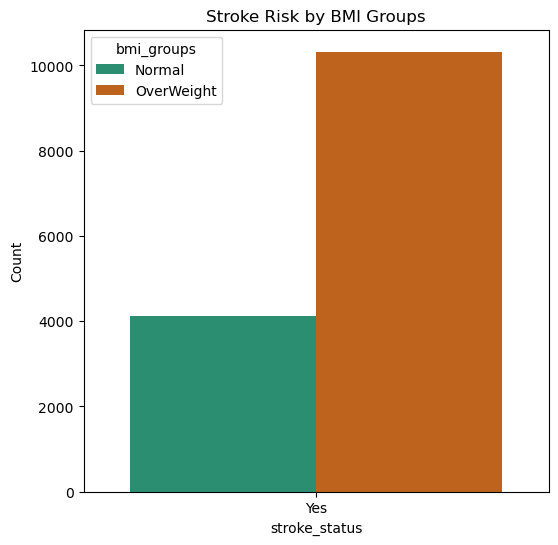

In [62]:
plot_categorical_relationships("smoking_status", "Stroke Risk by Smoking Status")
plot_categorical_relationships("diabetes_status", "Stroke Risk by Diabetes Status")
plot_categorical_relationships("bmi_groups", "Stroke Risk by BMI Groups")

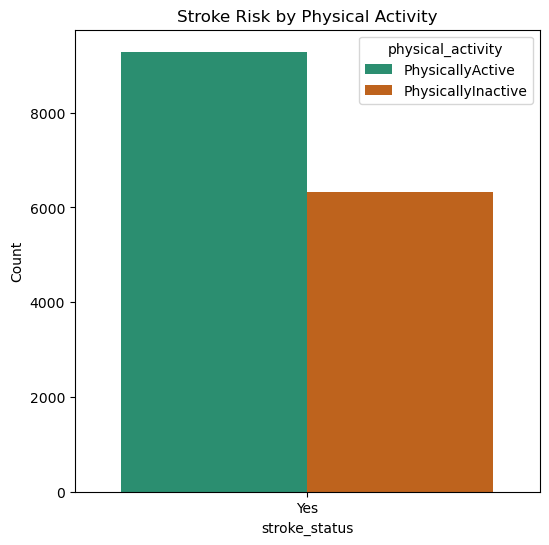

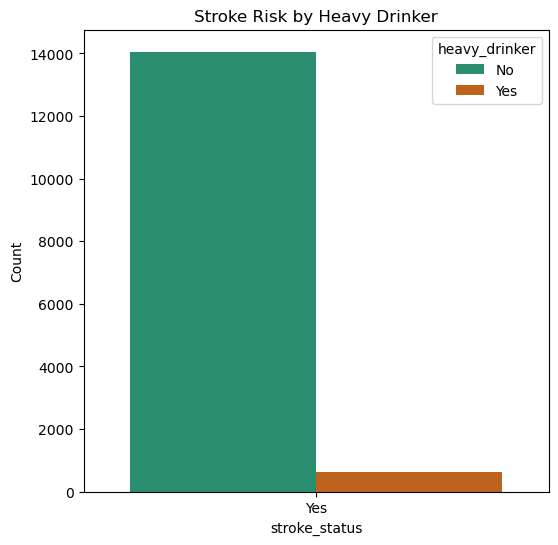

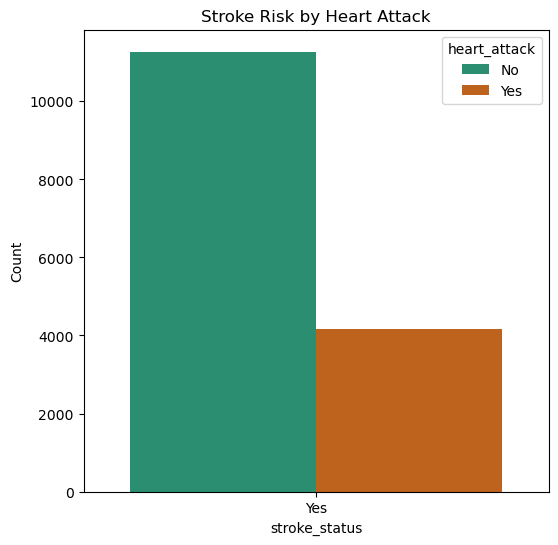

In [64]:
plot_categorical_relationships("physical_activity", "Stroke Risk by Physical Activity")
plot_categorical_relationships("heavy_drinker", "Stroke Risk by Heavy Drinker")
plot_categorical_relationships("heart_attack", "Stroke Risk by Heart Attack")


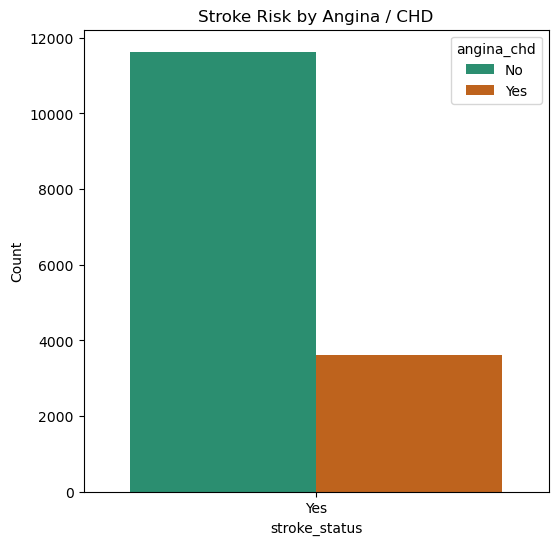

In [65]:
plot_categorical_relationships("angina_chd", "Stroke Risk by Angina / CHD")

# Calculating The Percentages Stroke Positive Individuals With Each Risk Factor:


### Calculating The Percentages Stroke Positive Individuals by Age Groups:

In [134]:

def calculate_percentage_and_count(data, column_name):
    unique_values = data[column_name].unique()

    # Initializing an empty DataFrame to store results
    result_df = pd.DataFrame(columns=[column_name, 'Percentage_of_Stroke', 'Count'])

    # Calculating percentage for each unique value in the specified column
    for value in unique_values:
        total_strokes = (data['stroke_status'] == "Yes").sum()
        value_strokes_total = ((data['stroke_status'] == "Yes") & (data[column_name] == value)).sum()

        pct_value_strokes = (value_strokes_total / total_strokes) * 100 if total_strokes > 0 else 0

        # Appending the result to the DataFrame
        result_df = result_df.append({column_name: value, 'Percentage_of_Stroke': pct_value_strokes,
                                      'Count': value_strokes_total}, ignore_index=True)

    return result_df

# Printing The Resultant Data frame
column_name = 'age_groups'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[result_df[column_name] != 14].sort_values(column_name)


,age_groups,Percentage_of_Stroke,Count
9,1.0,0.599605,94.0
12,2.0,0.752695,118.0
13,3.0,1.141800,179.0
11,4.0,1.632965,256.0
4,5.0,2.462206,386.0
8,6.0,3.444537,540.0
7,7.0,5.696243,893.0
0,8.0,8.662372,1358.0
6,9.0,11.947439,1873.0
1,10.0,13.593162,2131.0


In [71]:
stroke_rf.columns

Index(['ages', 'age_groups', 'gender', 'race', 'stroke_status',
       'smoking_status', 'diabetes_status', 'bmi_groups', 'physical_activity',
       'heavy_drinker', 'heart_attack', 'angina_chd'],
      dtype='object')

### Calculating The Percentages Stroke Positive Individuals by Gender:

In [133]:
column_name = 'gender'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df.sort_values(column_name)

,gender,Percentage_of_Stroke,Count
0,Female,54.595905,8559
1,Male,45.404095,7118


### Calculating The Percentages Stroke Positive Individuals by Race:

In [132]:
column_name = 'race'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df.sort_values(column_name)

,race,Percentage_of_Stroke,Count
3,Alaskan,2.659948,417
2,Asian,1.135421,178
1,Black,10.837533,1699
5,Hispanic,5.109396,801
4,Other,4.229125,663
0,White,76.028577,11919


### Calculating The Percentages Stroke Positive Individuals by Smoking Status:

In [131]:
column_name = 'smoking_status'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[result_df[column_name] != 9]

,smoking_status,Percentage_of_Stroke,Count
0,EveryDay,13.829177,2168
2,NonSmoker,41.634241,6527
3,Former,35.051349,5495
4,SomeDay,4.847866,760


### Calculating The Percentages Stroke Positive Individuals by Diabetes Status:

In [130]:
column_name = 'diabetes_status'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[~result_df[column_name].isin([7,9])]

,diabetes_status,Percentage_of_Stroke,Count
0,Diabetic,31.051859,4868
1,NonDiabetic,68.029597,10665
2,PrgDiabetic,0.688907,108
3,NaN,0.000000,0.0


### Calculating The Percentages Stroke Positive Individuals by BMI Groups:

In [129]:
column_name = 'bmi_groups'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[~result_df[column_name].isin([9])]

,bmi_groups,Percentage_of_Stroke,Count
0,Normal,26.235887,4113
1,OverWeight,65.860815,10325


### Calculating The Percentages Stroke Positive Individuals by Physical Activity:

In [128]:
column_name = 'physical_activity'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[~result_df[column_name].isin([9])]

,physical_activity,Percentage_of_Stroke,Count
0,PhysicallyActive,59.265166,9291
1,PhysicallyInactive,40.364866,6328


### Calculating The Percentages Stroke Positive Individuals by Heavy Drinker:

In [127]:
column_name = 'heavy_drinker'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[~result_df[column_name].isin([9])]

,heavy_drinker,Percentage_of_Stroke,Count
0,No,89.653633,14055
2,Yes,3.891051,610


### Calculating The Percentages Stroke Positive Individuals by Heart Attack:

In [126]:
column_name = 'heart_attack'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[~result_df[column_name].isin([7,9])]

,heart_attack,Percentage_of_Stroke,Count
0,No,71.901512,11272
2,Yes,26.561204,4164
3,NaN,0.000000,0.0


### Calculating The Percentages Stroke Positive Individuals by Angina / CHD:

In [125]:
column_name = 'angina_chd'  # Replace with the desired column name
result_df = calculate_percentage_and_count(stroke_rf[stroke_rf['stroke_status'] != 9], column_name)
result_df[~result_df[column_name].isin([7,9])]

,angina_chd,Percentage_of_Stroke,Count
0,No,74.229763,11637
1,Yes,22.963577,3600
3,NaN,0.000000,0.0


# Hypothesis tests



**1) Is there a relationship between smoking status and the occurrence of heart attacks?**


**2) Do higher BMI groups show an increased prevalence of diabetes?**


**3) Is there any association between physical activity and the likelihood of angina or coronary heart disease?**


## 1- Is there a relationship between smoking status and the occurrence of heart attacks?

- **Null Hypothesis (H<sub>0</sub>):** There is no relationship between Smoking and Occurance of Heart Attack.
- **Alternate Hypothesis (H<sub>a</sub>)**: There is a significant relationship between Smoking and Occurance of Heart Attack.

In [127]:
# Selecting the relevant columns
heart_attack = stroke_rf['heart_attack']
smoking_status = stroke_rf['smoking_status']

# Creating a contingency table
contingency_table_smoking_hrtattack = pd.crosstab(heart_attack, smoking_status)

# Applying Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table_smoking_hrtattack)

chi2, p

(4563.296491520896, 0.0)

### Interpretation

**Statistical Significance:**

The very low p-value (p = 0.0) indicates that the association between smoking status and the occurrence of heart attacks is statistically significant. This suggests that the observed relationship is unlikely to be due to random chance.

**Practical Significance:**

The large Chi-square statistic (chi2 = 4563.30) implies a substantial difference between the observed and expected frequencies. While statistical significance is evident, practical significance assesses whether this observed effect is large enough to be meaningful in real-world terms. The large chi2 value suggests a strong association.

**Implications in Context:**

**Positive Implication:** The statistically significant relationship between smoking status and the occurrence of heart attacks suggests that individuals who smoke may be at an increased risk of experiencing heart attacks. This finding can have important implications for public health interventions and smoking cessation programs.

**Public Health Implications:** Healthcare professionals and public health organizations may use this information to emphasize the risks of smoking in cardiovascular health education and prevention campaigns. It reinforces the importance of smoking cessation programs and policies to reduce the prevalence of smoking and, consequently, the incidence of heart attacks.

**Limitations:** While the statistical significance is clear, it's important to consider potential confounding factors that might influence the relationship. Additionally, causation cannot be inferred from observational data alone.

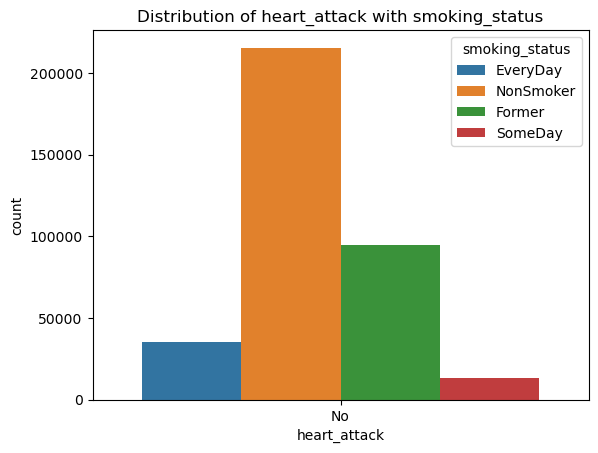

In [96]:
smoking_status_filtered = stroke_rf[(stroke_rf['smoking_status'] != 9) & (stroke_rf['heart_attack'].isin(['yes','No']))]

ax = sns.countplot(x='heart_attack', hue='smoking_status', data=smoking_status_filtered)
ax.set_title('Distribution of heart_attack with smoking_status')
plt.show()

**heart_attack:** 1 = yes, 2 = No

**smoking_status:** 
- 1 = Current smoker - now smokes every day
- 2 = Current smoker - now smokes some days 
- 3 = Former smoker
- 4 = Never smoked 

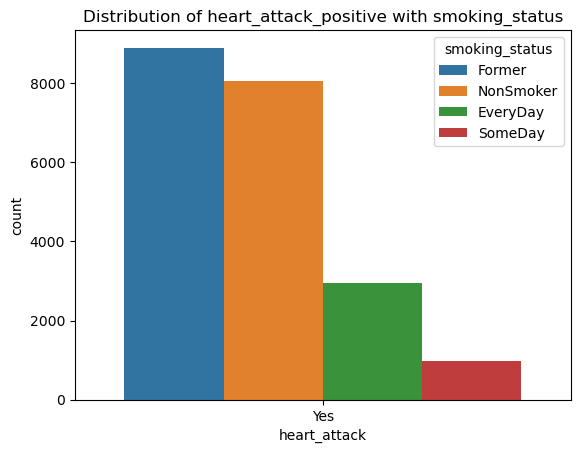

In [100]:
smoking_status_filtered = stroke_rf[(stroke_rf['smoking_status'] != 9) & (stroke_rf['heart_attack'] == 'Yes')]

ax = sns.countplot(x='heart_attack', hue='smoking_status', data=smoking_status_filtered)
ax.set_title('Distribution of heart_attack_positive with smoking_status')
plt.show()

**heart_attack:** 1 = yes, 2 = No

**smoking_status:** 
- 1 = Current smoker - now smokes every day
- 2 = Current smoker - now smokes some days 
- 3 = Former smoker
- 4 = Never smoked 

### Calculating Percentage of Heart_attack for Each Smoking Status

In [124]:
smoking_status = stroke_rf['smoking_status'].unique()

# Initializing an empty DataFrame to store results
pct_hrtattack_result_df = pd.DataFrame(columns=['Smoking_Status', 'Percentage_of_Heart_Attack', 'count'])

# Calculating percentage for each age group
for i in smoking_status:
    heart_attack_total = (stroke_rf['heart_attack'] == 'Yes').sum()

    smoking_hrtattack_total = ((stroke_rf['heart_attack'] == 'Yes') & (stroke_rf['smoking_status'] == i)).sum()

    pct_smoking_hrtattack = (smoking_hrtattack_total / heart_attack_total) * 100 if smoking_hrtattack_total > 0 else 0

    # Appending the result to the DataFrame
    pct_hrtattack_result_df = pct_hrtattack_result_df.append({'Smoking_Status': i, 'Percentage_of_Heart_Attack': pct_smoking_hrtattack,
                                                             'count': smoking_hrtattack_total}, ignore_index=True)


pct_hrtattack_result_df[pct_hrtattack_result_df['Smoking_Status'] !=9].sort_values('Smoking_Status')

,Smoking_Status,Percentage_of_Heart_Attack,count
0,EveryDay,13.476340,2959
3,Former,40.561097,8906
2,NonSmoker,36.726329,8064
4,SomeDay,4.490595,986


## 2- Does higher BMI group (Obese / Overweight) show an increased prevalence of diabetes?

- **Null Hypothesis (H<sub>0</sub>):** There is no association between Higer BMI group and prevelence of Diabetes.
- **Alternate Hypothesis (H<sub>a</sub>)**: There is a significant association between Higer BMI group and prevelence of Diabetes.

In [147]:
# Selecting the relevant columns
bmi_groups = stroke_rf['bmi_groups'] == 2
diabetes_status = stroke_rf['diabetes_status']

# Creating a contingency table
contingency_table = pd.crosstab(bmi_groups, diabetes_status)

# Applying Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p

(7278.540691151475, 0.0)

### Interpretation

**Statistical Significance:**

The very low p-value (p = 0.0) indicates that the association between BMI group (Obese/Overweight) and the prevalence of diabetes is statistically significant. This suggests that the observed relationship is unlikely to be due to random chance.

**Practical Significance:**

The large Chi-square statistic (chi2 = 7278.54) implies a substantial difference between the observed and expected frequencies. While statistical significance is evident, practical significance assesses whether this observed effect is large enough to be meaningful in real-world terms. The large chi2 value suggests a strong association.

**Implications in Context:**

**Positive Implication:** The statistically significant relationship between higher BMI groups and the prevalence of diabetes suggests that individuals classified as Obese or Overweight may have an increased risk of diabetes. This finding is crucial for healthcare professionals, policymakers, and public health interventions targeting diabetes prevention and management.

**Public Health Implications:** These results may underscore the importance of public health initiatives aimed at addressing obesity and overweight as part of a comprehensive strategy to reduce the prevalence of diabetes. It may involve promoting healthy lifestyles, dietary changes, and physical activity to manage weight and prevent the onset of diabetes.

**Individual Health Implications:** For individuals in higher BMI groups, these findings emphasize the importance of regular health check-ups, diabetes screenings, and lifestyle modifications to manage and reduce the risk of diabetes.

**Limitations:** While the statistical significance is clear, it's crucial to consider potential confounding factors and the complexity of the relationship between BMI and diabetes. Additionally, causation cannot be inferred from observational data alone.

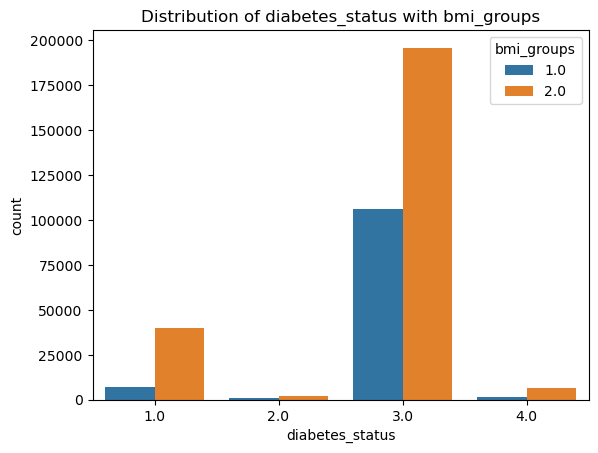

In [159]:
diabetes_status_filtered = stroke_rf[(stroke_rf['bmi_groups'].isin([1,2])) & (stroke_rf['diabetes_status'].isin([1,2,3,4]))]

ax = sns.countplot(x='diabetes_status', hue='bmi_groups', data=diabetes_status_filtered)
ax.set_title('Distribution of diabetes_status with bmi_groups')
plt.show()

**bmi_groups:** 

- 1 = No- Respondents not classified as overweight or obese based on body mass index. 
- 2 = Yes- Respondents classified as overweight or obese based on body mass index.

**diabetes_status:** 

- 1 = Yes
- 2 = yes, but female told only during pregnancy
- 3 = No
- 4 = No, pre-diabetes or borderline diabetes

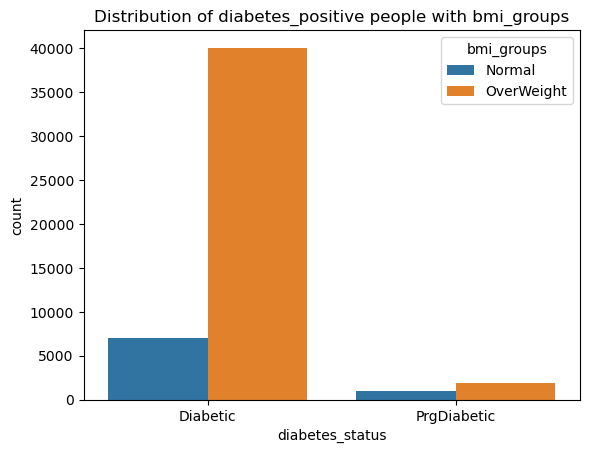

In [109]:
diabetes_status_filtered = stroke_rf[(stroke_rf['bmi_groups'] != 9) & (stroke_rf['diabetes_status'] == 'Diabetic')
                                    |(stroke_rf['bmi_groups'] != 9) & (stroke_rf['diabetes_status'] == 'PrgDiabetic')]

ax = sns.countplot(x='diabetes_status', hue='bmi_groups', data=diabetes_status_filtered)
ax.set_title('Distribution of diabetes_positive people with bmi_groups')
plt.show()

**bmi_groups:** 

- 1 = Not Obese 
- 2 = Obese

**diabetes_status:** 

- 1 = Yes
- 2 = yes, but female told only during pregnancy

### Calculating Percentage of Diabetes for Each BMI Group

In [123]:
bmi_groups = stroke_rf['bmi_groups'].unique()

# Initializing an empty DataFrame to store results
pct_diabetes_result_df = pd.DataFrame(columns=['BMI_Groups', 'Percentage_of_Diabetes', 'Count'])

# Calculating percentage for each age group
for i in bmi_groups:
    diabetes_total = ((stroke_rf['diabetes_status'] == 'Diabetic') | (stroke_rf['diabetes_status'] == 'PrgDiabetic')).sum()

    bmi_diabetes_total = ((stroke_rf['diabetes_status'] != 'NonDiabetic') & (stroke_rf['bmi_groups'] == i)).sum()

    pct_bmi_diabetes = (bmi_diabetes_total / diabetes_total) * 100 if diabetes_total > 0 else 0

    # Appending the result to the DataFrame
    pct_diabetes_result_df = pct_diabetes_result_df.append({'BMI_Groups': i, 'Percentage_of_Diabetes': pct_bmi_diabetes,
                                                            'Count': bmi_diabetes_total}, ignore_index=True)


pct_diabetes_result_df[pct_diabetes_result_df['BMI_Groups'] != 9].sort_values('BMI_Groups')

,BMI_Groups,Percentage_of_Diabetes,Count
0,Normal,14.658902,8131
1,OverWeight,76.283623,42313


## 3- Is there any association between physical activity and the likelihood of angina or coronary heart disease?

- **Null Hypothesis (H<sub>0</sub>):** There is no association between physical activity and the likelihood of angina or coronary heart disease
- **Alternate Hypothesis (H<sub>a</sub>)**: There is association between physical activity and the likelihood of angina or coronary heart disease

In [273]:
# Selecting the relevant columns
physical_activity = stroke_rf['physical_activity'] 
angina_chd = stroke_rf['angina_chd'] 

# Creating a contingency table
contingency_table_ph_chd = pd.crosstab(physical_activity, angina_chd)

# Applying Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table_ph_chd)

chi2, p

(5330.077039995258, 0.0)

### Interpretation

**Statistical Significance:**

The very low p-value (p = 0.0) indicates that the association between engaging in physical activity and the likelihood of angina or coronary heart disease is statistically significant. This suggests that the observed relationship is unlikely to be due to random chance.

**Practical Significance:**

The large Chi-square statistic (chi2 = 2956.17) implies a substantial difference between the observed and expected frequencies. While statistical significance is evident, practical significance assesses whether this observed effect is large enough to be meaningful in real-world terms. The large chi2 value suggests a strong association.

**Implications in Context:**

**Positive Implication:** The statistically significant relationship between engaging in physical activity and a reduced likelihood of angina or coronary heart disease is promising for public health. It suggests that regular physical activity may have a protective effect on cardiovascular health.

**Public Health Implications:** These findings may support public health initiatives promoting physical activity as a key component of cardiovascular disease prevention. Encouraging individuals to adopt and maintain an active lifestyle could contribute to reducing the prevalence of angina and coronary heart disease.

**Individual Health Implications:** For individuals, the results underscore the importance of incorporating regular physical activity into their lifestyle for cardiovascular health. This may include activities such as walking, jogging, swimming, or other forms of exercise.

**Limitations:** While the statistical significance is clear, it's important to consider potential confounding factors and the complexity of the relationship between physical activity and cardiovascular health. Additionally, causation cannot be inferred from observational data alone.

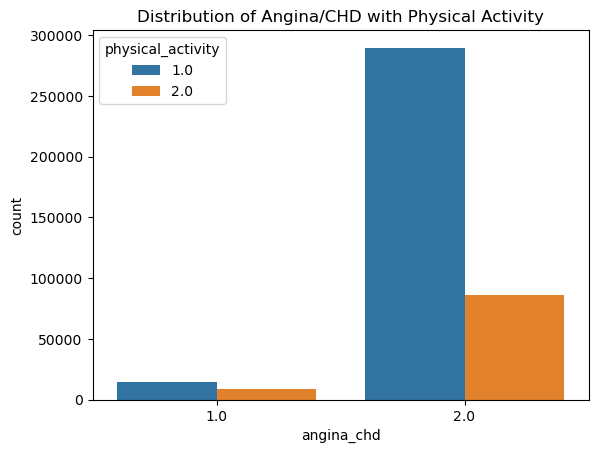

In [167]:
physical_activity_filtered = stroke_rf[(stroke_rf['physical_activity'] != 9) & (stroke_rf['angina_chd'].isin([1,2]))]

ax = sns.countplot(x='angina_chd', hue='physical_activity', data= physical_activity_filtered)
ax.set_title('Distribution of Angina/CHD with Physical Activity')
plt.show()

**angina_chd:** 1 = Yes, 2 = No

**physical_activity:** 

- 1 = Had physical activity or exercise (Respondents who reported doing any physical activity or exercise)
- 2 = No physical activity or exercise in last 30 days (Respondents who reported doing no physical activity or exercise)

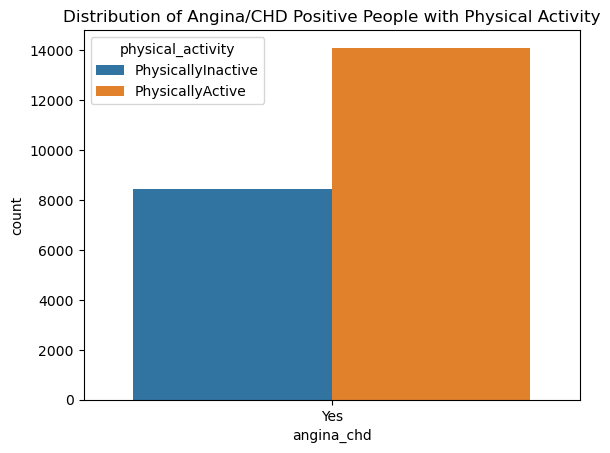

In [119]:
physical_activity_filtered = stroke_rf[(stroke_rf['physical_activity'] != 9) & (stroke_rf['angina_chd'] == 'Yes')]

ax = sns.countplot(x='angina_chd', hue='physical_activity', data= physical_activity_filtered)
ax.set_title('Distribution of Angina/CHD Positive People with Physical Activity')
plt.show()

**angina_chd:** 1 = Yes, 2 = No

**physical_activity:** 

- 1 = Physically Active
- 2 = Physically In-active

### Calculating Percentage of Angina / CHD Positive People with Phycical Activity Status

In [122]:
physical_activity = stroke_rf['physical_activity'].unique()

# Initializing an empty DataFrame to store results
pct_angina_result_df = pd.DataFrame(columns=['Physical_Activity', 'Percentage_of_Angina_CHD', 'Count'])

# Calculating percentage for each age group
for i in physical_activity:
    angina_total = (stroke_rf['angina_chd'] == 'Yes').sum()

    ph_angina_total = ((stroke_rf['angina_chd'] == 'Yes') & (stroke_rf['physical_activity'] == i)).sum()

    pct_ph_angina = (ph_angina_total / angina_total) * 100 if angina_total > 0 else 0

    # Appending the result to the DataFrame
    pct_angina_result_df = pct_angina_result_df.append({'Physical_Activity': i, 'Percentage_of_Angina_CHD': pct_ph_angina,
                                                       'Count': ph_angina_total }, ignore_index=True)

pct_angina_result_df[pct_angina_result_df['Physical_Activity'] != 9].sort_values('Physical_Activity')

,Physical_Activity,Percentage_of_Angina_CHD,Count
0,PhysicallyActive,62.417028,14105
1,PhysicallyInactive,37.339588,8438


# Risk factors Logistic Regression

**Logistics regression is in another notebook naming "BRFSS Data Analysis-B (Logistic Regression)"**